<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

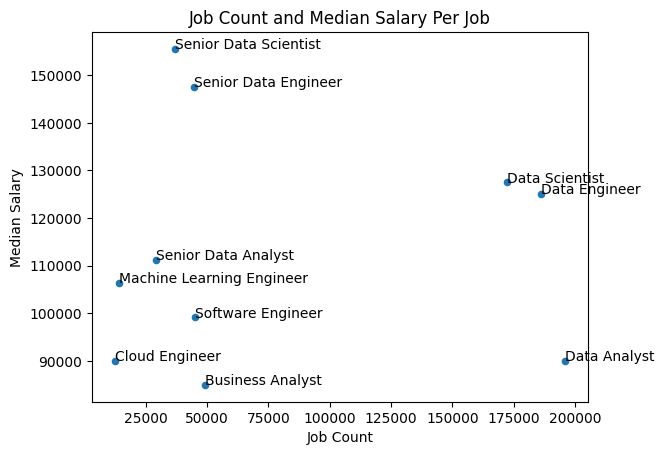

In [3]:
job_stats_df = df.copy()

job_stats_df = job_stats_df.groupby('job_title_short').agg(
  median_salary = ('salary_year_avg', 'median'),
  job_count = ('job_title_short', 'count')
)

job_stats_df.plot(kind='scatter', x='job_count', y='median_salary')

for i, text in enumerate(job_stats_df.index):
  plt.text(job_stats_df['job_count'].iloc[i], job_stats_df['median_salary'].iloc[i], text)

plt.xlabel('Job Count')
plt.ylabel('Median Salary')
plt.title('Job Count and Median Salary Per Job')
plt.show()


---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

Text(0.5, 1.0, 'Top 7 Countries by Median Yearly Salary vs Job Count')

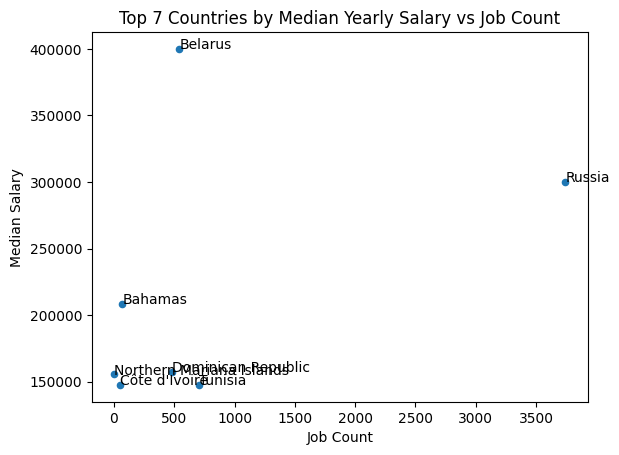

In [4]:
country_stats = df.copy()

country_stats = country_stats.groupby('job_country').agg(
  median_salary = ('salary_year_avg', 'median'),
  job_count = ('job_title_short', 'count')
).sort_values(by='median_salary', ascending=False).head(7)

country_stats.plot(kind='scatter', x='job_count', y='median_salary')

for i, country in enumerate(country_stats.index):
  plt.text(country_stats['job_count'].iloc[i], country_stats['median_salary'].iloc[i], country)

plt.xlabel('Job Count')
plt.ylabel('Median Salary')
plt.title('Top 7 Countries by Median Yearly Salary vs Job Count')

---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

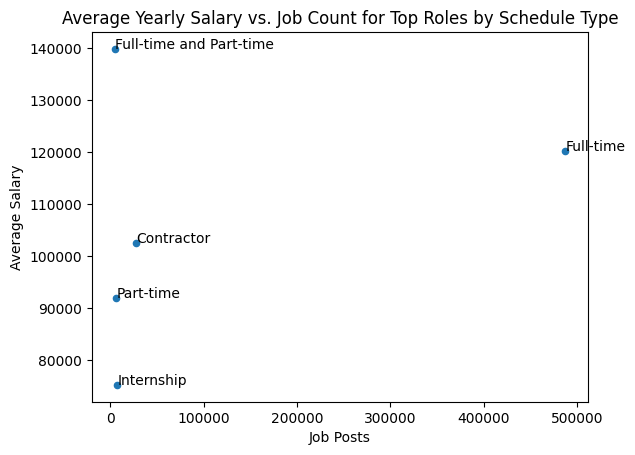

In [16]:
# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

titles_df = df.copy()

titles_df = titles_df[titles_df['job_title_short'].isin(target_job_titles)]

titles_df = titles_df.groupby('job_schedule_type').agg(
  avg_salary = ('salary_year_avg', 'mean'),
  job_count = ('job_title_short', 'count')
).sort_values(by='job_count', ascending=False).head()

titles_df.plot(kind='scatter', x='job_count', y='avg_salary')

for i, schedule in enumerate(titles_df.index):
  plt.text(titles_df['job_count'].iloc[i], titles_df['avg_salary'].iloc[i], schedule)

plt.xlabel('Job Posts')
plt.ylabel('Average Salary')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.show()

---